## Binary Classification Prediction

Desc: This notebook serves as a template for binary classification problem.

In [1]:
# import packages 
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Import dataset

In [2]:
stocks = pd.read_csv('Data/Smarket.csv', na_values='?').dropna()
print(stocks.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 0 to 1249
Data columns (total 10 columns):
Unnamed: 0    1250 non-null int64
Year          1250 non-null int64
Lag1          1250 non-null float64
Lag2          1250 non-null float64
Lag3          1250 non-null float64
Lag4          1250 non-null float64
Lag5          1250 non-null float64
Volume        1250 non-null float64
Today         1250 non-null float64
Direction     1250 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 107.4+ KB
None


In [3]:
stocks.tail()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1245,1246,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,1247,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,1248,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,1249,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down
1249,1250,2005,-0.298,0.130,-0.955,0.043,0.422,1.38254,-0.489,Down


In [4]:
# convert categorical variables to dummy variables (0/1)
stocks_up = pd.get_dummies(stocks['Direction'])

# Join the dummy variables to the main dataframe
stocks_new = pd.concat([stocks, stocks_up], axis=1)
stocks_new.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Down,Up
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,0,1
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,0,1
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,1,0
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,0,1
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,0,1


In [5]:
x_columns = ['Year', 'Lag1','Lag2','Lag3','Lag4','Lag5','Volume']
stocks_new[x_columns].describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470


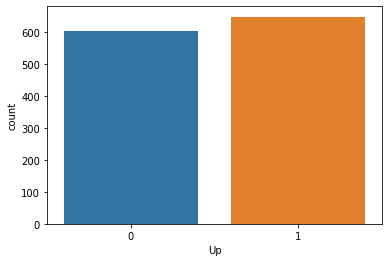

In [6]:
# Plot the distribution of the y variable
sns.countplot(stocks_new.Up, label="Count")

In [7]:
# split the dataset for cross validation
from sklearn.model_selection import train_test_split


X = stocks_new[x_columns]
y = stocks_new['Up']
X_train, X_test, y_train, y_test = train_test_split\
  (X, y, train_size = 0.6, random_state = 1)

In [8]:
print("The length of the train data is: ", len(y_train))
print("The length of the test data is:", len(y_test))


The length of the train data is:  750
The length of the test data is: 500


# 2. Data Analysis

### 2.1 Logistic Regression

In [9]:
# build up a logistic regression model that can print out the p-values
import statsmodels.discrete.discrete_model as sm
logit = sm.Logit(y_train, X_train)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 1.586280
         Iterations 4


C:\Users\pzx0002\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pzx0002\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pzx0002\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                  750
Model:                          Logit   Df Residuals:                      743
Method:                           MLE   Df Model:                            6
Date:                Tue, 11 Feb 2020   Pseudo R-squ.:                     inf
Time:                        16:52:29   Log-Likelihood:                -1189.7
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Year       -7.666e-05      0.000     -0.499      0.617      -0.000       0.000
Lag1          -0.0255      0.065     -0.390      0.697      -0.154       0.103
Lag2           0.0269      0.064      0.419      0.675      -0.099       0.153
Lag3          -0.0513      0.065     -0.789      0.430      -0.179       0.076
Lag4          -0.0377      0.068     -0.557      0.577      -0.170       0.095
Lag5           0.0014      0.063      0.023      0.982      -0.121       0.124
Volume         0.1664      0.201      0.829      0.407      -0.227       0.560
==============================================================================
"""

According to the p-values, none of the predictors are significant.

In [10]:
from sklearn.linear_model import LogisticRegression

# build the logit regression model, using the training dataset
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# generate prediction for the test dataset
y_pred_logit = logreg.predict(X_test)

C:\Users\pzx0002\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
# model evaluation 1: confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_logit).ravel()
print(tn, fp, fn, tp)

confusion_matrix(y_test, y_pred_logit)

38 207 38 217


array([[ 38, 207],
       [ 38, 217]], dtype=int64)

In [12]:
# model evaluation 2: Accuracy, sensitivity & specificty
print("Accuracy = %s" %((tp+tn)/(tp+fn+tn+fp)))
print("Sensitivity = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))

Accuracy = 0.51
Sensitivity = 0.8509803921568627
Specificity = 0.15510204081632653


In [13]:
# model evaluation 3: precision & recall & F1_score
print(classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       0.50      0.16      0.24       245
           1       0.51      0.85      0.64       255

    accuracy                           0.51       500
   macro avg       0.51      0.50      0.44       500
weighted avg       0.51      0.51      0.44       500



AUC= 0.4889315726290516


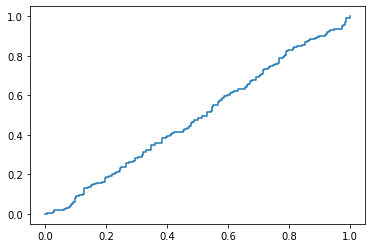

In [14]:
# model evaluation 4: ROC and AUC


# generate the predicted probability
y_pred_prob = logreg.predict_proba(X_test)[:,1]
print("AUC=", roc_auc_score(y_test, y_pred_prob))

# plot ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)

## 2.2 Decision Tree Model

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

C:\Users\pzx0002\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


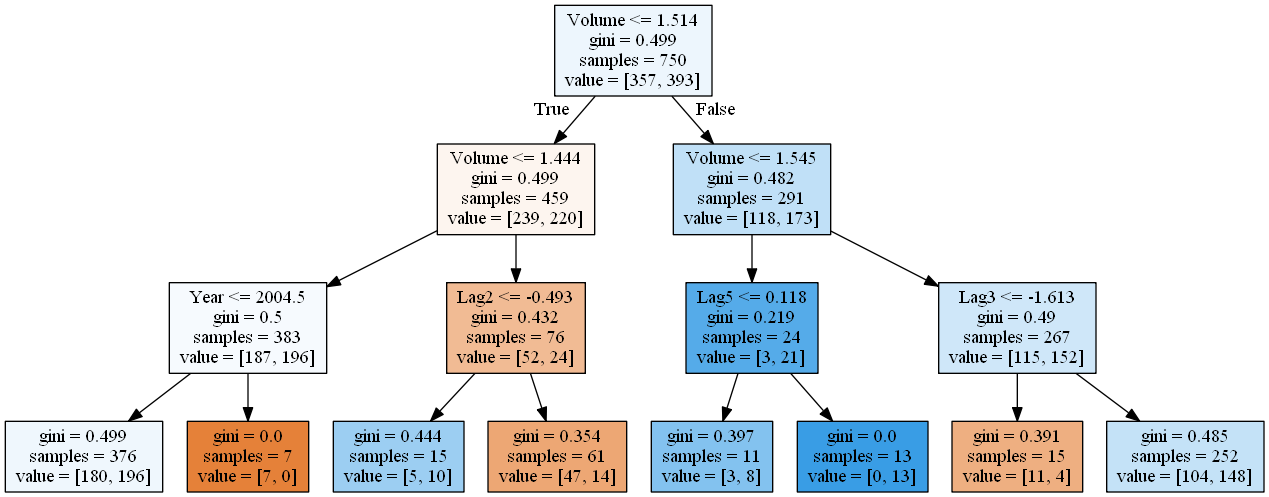

In [16]:
# Print the tree image

import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)


graph = print_tree(tree, features=x_columns)
graph.write_png("tree.png")
Image(graph.create_png())


[('Year', 0.14449212218392762), ('Lag1', 0.0), ('Lag2', 0.17803521040896955), ('Lag3', 0.11262188299741162), ('Lag4', 0.0), ('Lag5', 0.0342927679504084), ('Volume', 0.5305580164592827)]


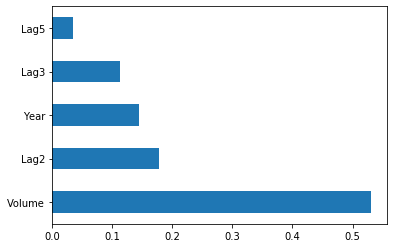

In [17]:
# View a list of the features and their importance scores
print(list(zip(X_train, tree.feature_importances_)))

# plot the important features
feat_importances = pd.Series(tree.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [18]:
# model evaluation 1: confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_tree).ravel()
print(tn, fp, fn, tp)

confusion_matrix(y_test, y_pred_tree)

26 219 23 232


array([[ 26, 219],
       [ 23, 232]], dtype=int64)

In [19]:
# model evaluation 2: sensitivity & specificty
print("Accuracy = %s" %((tp+tn)/(tp+fn+tn+fp)))
print("Sensitivity = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))

Accuracy = 0.516
Sensitivity = 0.9098039215686274
Specificity = 0.10612244897959183


In [20]:
# model evaluation 3: precision & recall & F1_score
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.53      0.11      0.18       245
           1       0.51      0.91      0.66       255

    accuracy                           0.52       500
   macro avg       0.52      0.51      0.42       500
weighted avg       0.52      0.52      0.42       500



AUC= 0.5287875150060024


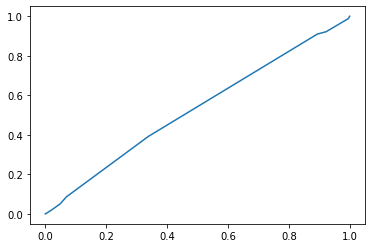

In [21]:
# model evaluation 4: ROC and AUC

# generate the predicted probability
y_pred_prob_tree = tree.predict_proba(X_test)[:,1]

print("AUC=", roc_auc_score(y_test, y_pred_prob_tree))

# plot ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_tree)
plt.plot(fpr, tpr)